In this notebook, I’ll explore using neural networks and deep learning techniques on the CIFAR dataset.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10
num_train = 49000

# Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


# Data Visualization

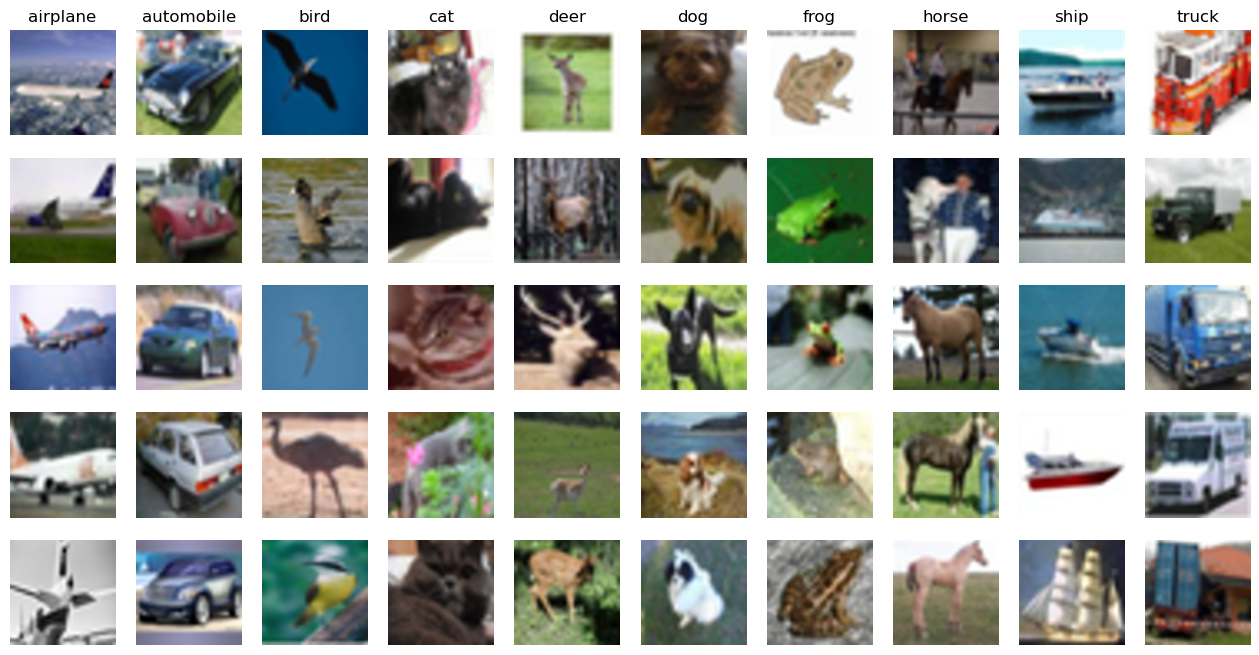

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

# Data Preprocessing

In [6]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


###### Scaling

In [7]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Multi-layer Neural Network

In [9]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=200, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
model.add(Dense(units=200))
model.add(Activation(activation='relu'))

# Third hidden Layer
model.add(Dense(units=200, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# fourth hidden Layer
model.add(Dense(units=200))
model.add(Activation(activation='relu'))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               614600    
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               4

#### Training the model

In [11]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15


192/192 [==============================] - 3s 10ms/step - loss: 1.7157 - accuracy: 0.3897 - val_loss: 1.6289 - val_accuracy: 0.4330
Epoch 2/15
192/192 [==============================] - 2s 9ms/step - loss: 1.4801 - accuracy: 0.4766 - val_loss: 1.4514 - val_accuracy: 0.4960
Epoch 3/15
192/192 [==============================] - 2s 9ms/step - loss: 1.3657 - accuracy: 0.5144 - val_loss: 1.4113 - val_accuracy: 0.5000
Epoch 4/15
192/192 [==============================] - 2s 9ms/step - loss: 1.2721 - accuracy: 0.5496 - val_loss: 1.4091 - val_accuracy: 0.5060
Epoch 5/15
192/192 [==============================] - 2s 9ms/step - loss: 1.1993 - accuracy: 0.5772 - val_loss: 1.4837 - val_accuracy: 0.4840
Epoch 6/15
192/192 [==============================] - 2s 9ms/step - loss: 1.1258 - accuracy: 0.6016 - val_loss: 1.4154 - val_accuracy: 0.5220
Epoch 7/15
192/192 [==============================] - 2s 10ms/step - loss: 1.0547 - accuracy: 0.6275 - val_loss: 1.4555 - val_accuracy: 0.5300
Ep

We observe a significant difference between the training accuracy and validation accuracy, indicating potential **overfitting** .

### Adding Dropout and Batch Normalization

In [12]:
from keras.layers import BatchNormalization, Dropout

In [13]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                     

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps = 1500,
    decay_rate=1e-1
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 [==============================] - 3s 8ms/step - loss: 1.7961 - accuracy: 0.3537 - val_loss: 1.5790 - val_accuracy: 0.4340
Epoch 2/15
192/192 [==============================] - 1s 7ms/step - loss: 1.6059 - accuracy: 0.4244 - val_loss: 1.4649 - val_accuracy: 0.4880
Epoch 3/15
192/192 [==============================] - 1s 7ms/step - loss: 1.5212 - accuracy: 0.4517 - val_loss: 1.4043 - val_accuracy: 0.5120
Epoch 4/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4664 - accuracy: 0.4746 - val_loss: 1.3693 - val_accuracy: 0.5060
Epoch 5/15
192/192 [==============================] - 1s 7ms/step - loss: 1.4258 - accuracy: 0.4889 - val_loss: 1.3421 - val_accuracy: 0.5140
Epoch 6/15
192/192 [==============================] - 1s 7ms/step - loss: 1.3927 - accuracy: 0.5008 - val_loss: 1.3263 - val_accuracy: 0.5120
Epoch 7/15
192/192 [==============================] - 1s 7ms/step - loss: 1.3564 - accuracy: 0.5130 - val_loss: 1.3213 - val_accuracy: 0.5300
Epoch 

In [19]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 [==============================] - 0s 3ms/step - loss: 1.2957 - accuracy: 0.5395


[1.295657992362976, 0.5394999980926514]

We handled overfitting using Dropout and Batch Normalization.

# Convolutional Neural Networks

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [15]:
# Converting dataset to 4D array
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))

In [16]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

#print model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       147584    
                                                     

In [20]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=128,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
383/383 [==============================] - 178s 462ms/step - loss: 1.6649 - accuracy: 0.3761 - val_loss: 1.2502 - val_accuracy: 0.5590
Epoch 2/15
383/383 [==============================] - 183s 479ms/step - loss: 1.1738 - accuracy: 0.5751 - val_loss: 0.9842 - val_accuracy: 0.6560
Epoch 3/15
383/383 [==============================] - 186s 487ms/step - loss: 0.9587 - accuracy: 0.6636 - val_loss: 0.7898 - val_accuracy: 0.7180
Epoch 4/15
383/383 [==============================] - 189s 492ms/step - loss: 0.8113 - accuracy: 0.7157 - val_loss: 0.7007 - val_accuracy: 0.7370
Epoch 5/15
383/383 [==============================] - 188s 491ms/step - loss: 0.7162 - accuracy: 0.7526 - val_loss: 0.6633 - val_accuracy: 0.7610
Epoch 6/15
383/383 [==============================] - 172s 449ms/step - loss: 0.6416 - accuracy: 0.7787 - val_loss: 0.5787 - val_accuracy: 0.8040
Epoch 7/15
383/383 [==============================] - 175s 458ms/step - loss: 0.5849 - accuracy: 0.7964 - val_loss: 0.5831 -

# Saving and Loading model

In [21]:
# model.save('cnn_data_augmentation.h5')

In [17]:
model = keras.models.load_model('cnn_data_augmentation.h5')

# Evaluate

In [19]:
model.evaluate(x_test.reshape(-1,32,32,3), y_test, batch_size=256)

40/40 [==============================] - 8s 209ms/step - loss: 0.5461 - accuracy: 0.8269


[0.5460932850837708, 0.8269000053405762]

In [20]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

1/1 [==============================] - 0s 27ms/step


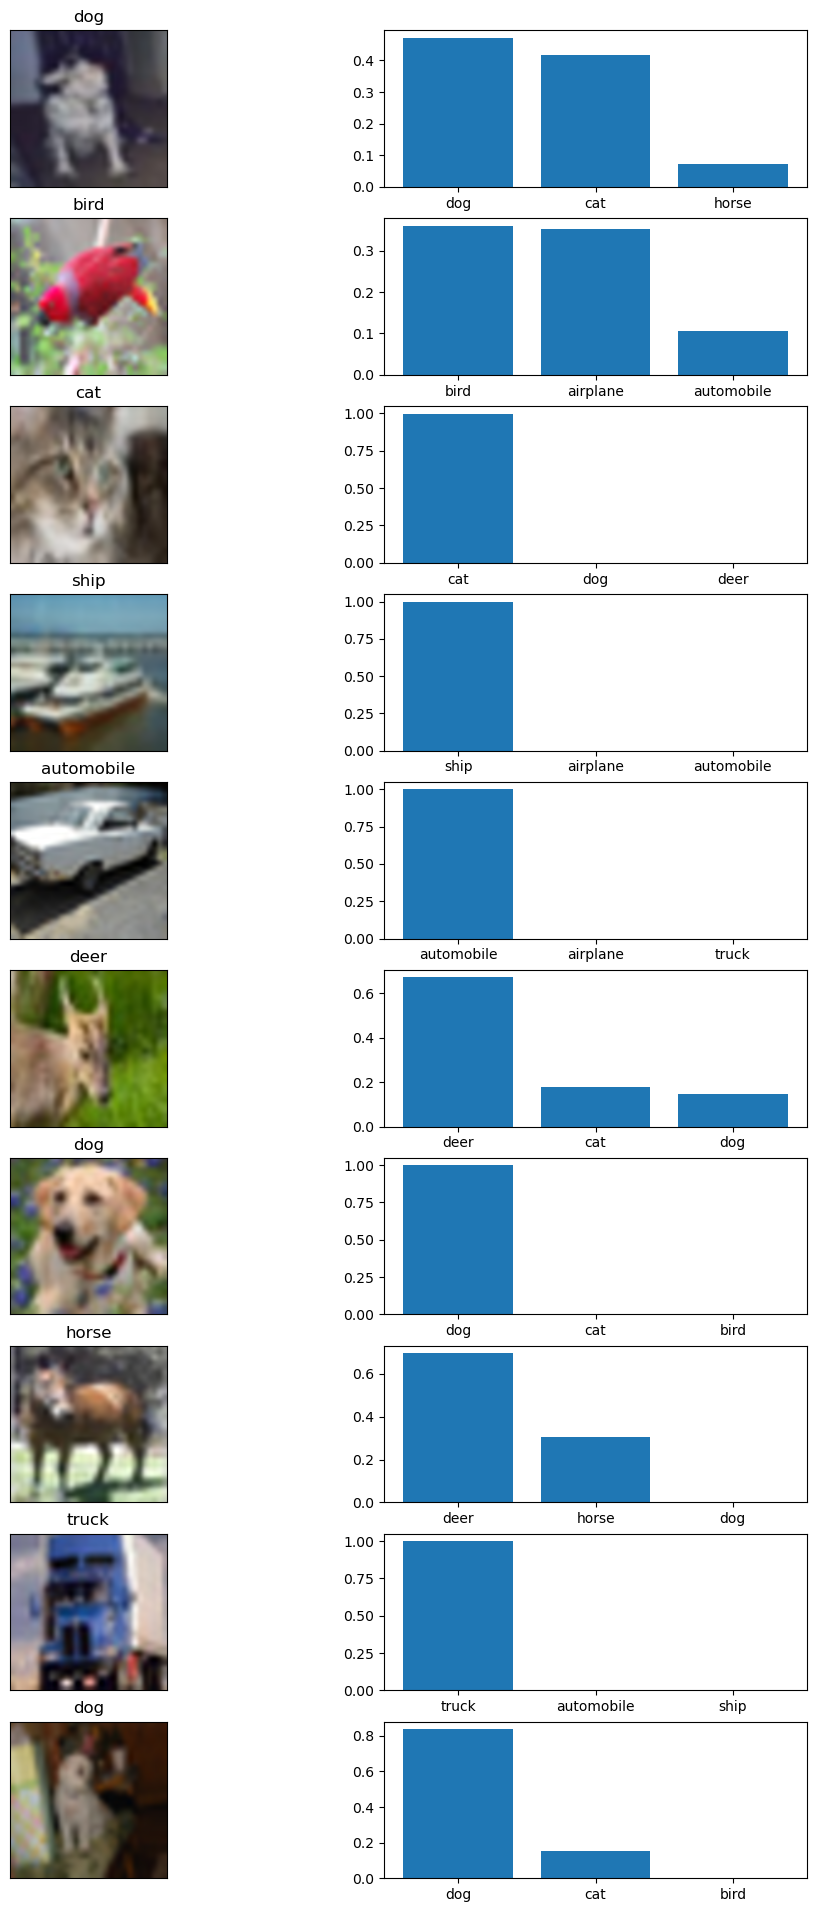

In [23]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)
x_test = x_test.reshape(-1, 32, 32, 3)
p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]
    
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()

I'll complete this notebook soon.